In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

import os
import sys
sys.path.insert(0, os.path.abspath('../my_pkgs'))
from plot_pkg.plot_utils import plot_decision_regions
import matplotlib.pyplot as plt

DATASET_PATH="G:\\TRABAJO\\Profesional\\Python\\anaconda\\dataset_partitioning_and_feature_selection\\"


# print(DATASET_PATH+"\\"+"wine.data")
df_wine = pd.read_csv(DATASET_PATH+"\\"+"wine.data", header=None)
df_wine.columns = ['Class label', 'Alcohol',
                    'Malic acid', 'Ash',
                    'Alcalinity of ash', 'Magnesium',
                    'Total phenols', 'Flavanoids',
                    'Nonflavanoid phenols',
                    'Proanthocyanins',
                    'Color intensity', 'Hue',
                    'OD280/OD315 of diluted wines',
                    'Proline']
print('Class labels', np.unique(df_wine['Class label']))
df_wine

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [2]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y)
# 0 mean, 1 std scaling (standarization) PREFERABLE
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train) # equivalente to: stdsc.fit(X_train) and then X_train_std = stdsc.transform(X_train)
X_test_std = stdsc.transform(X_test)

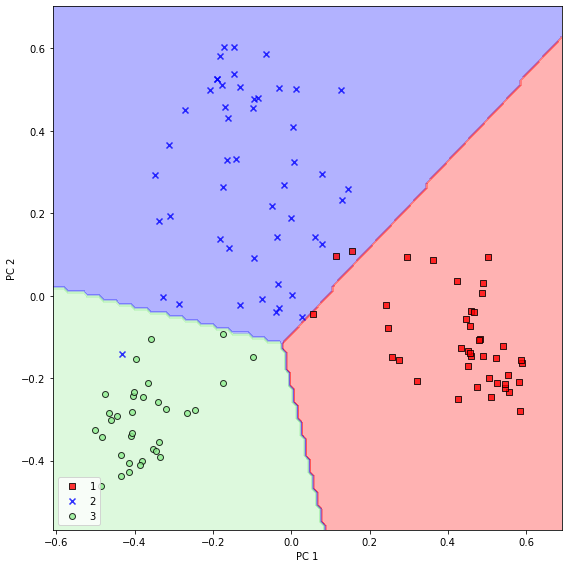

Acuracy: 0.9758064516129032


AttributeError: 'KernelPCA' object has no attribute 'explained_variance_ratio_'

In [8]:
# Unsupervised Feature Extraction
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1) # Kernel Princiupal Component Analysis is an unsupervised feature extraction strategy since class labels are not taken into account
lr = LogisticRegression(multi_class='ovr',
                        random_state=1,
                        solver='lbfgs')

model = lr
feat_extractor = kpca

# dimensionality reduction:
X_train_pca = feat_extractor.fit_transform(X_train_std)
# fitting the logistic regression model on the reduced dataset:
model.fit(X_train_pca, y_train)

# Plot
plot_decision_regions(X_train_pca, y_train, classifier=model)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()
print(f"Acuracy: {accuracy_score(y_train, model.predict(X_train_pca))}")
print(f"Exaplained variance ratios: {feat_extractor.explained_variance_ratio_}")

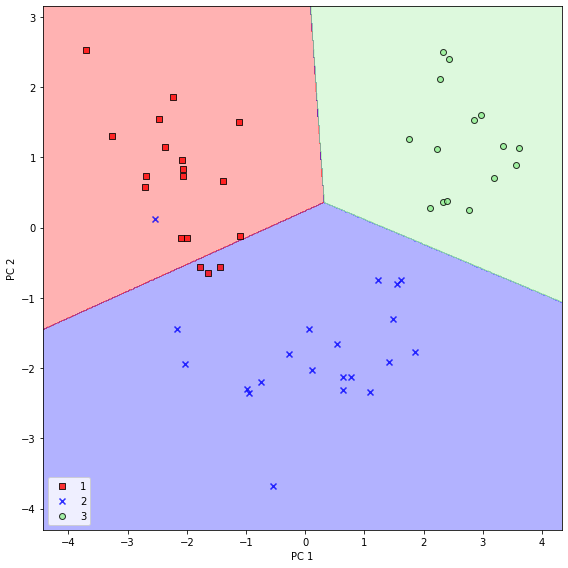

Acuracy: 0.9259259259259259


In [7]:
# Test with feature extraction

# dimensionality reduction:
X_test_pca = feat_extractor.transform(X_test_std)

# predicting with the logistic regression model on the reduced dataset:
plot_decision_regions(X_test_pca, y_test, classifier=model)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()
print(f"Acuracy: {accuracy_score(y_test, model.predict(X_test_pca))}")

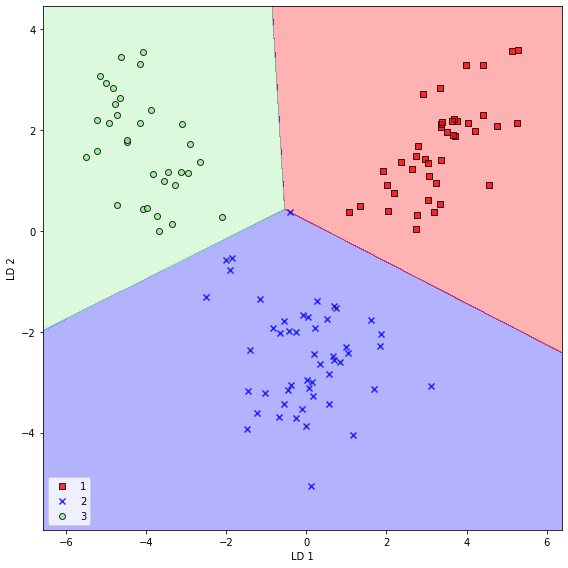

Acuracy: 1.0
Exaplained variance ratios: [0.66162655 0.33837345]


In [15]:
# Supervised Feature Extraction
lda = LDA(n_components=2) # PCA is a supervised feature extraction strategy since depends on class labels
lr = LogisticRegression(multi_class='ovr',
                        random_state=1,
                        solver='lbfgs')

model = lr
feat_extractor = lda

# dimensionality reduction:
X_train_lda = lda.fit_transform(X=X_train_std, y=y_train)
# fitting the logistic regression model on the reduced dataset:
model.fit(X_train_lda, y_train)

# Plot
plot_decision_regions(X_train_lda, y_train, classifier=model)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()
print(f"Acuracy: {accuracy_score(y_train, model.predict(X_train_lda))}")
print(f"Exaplained variance ratios: {feat_extractor.explained_variance_ratio_}")


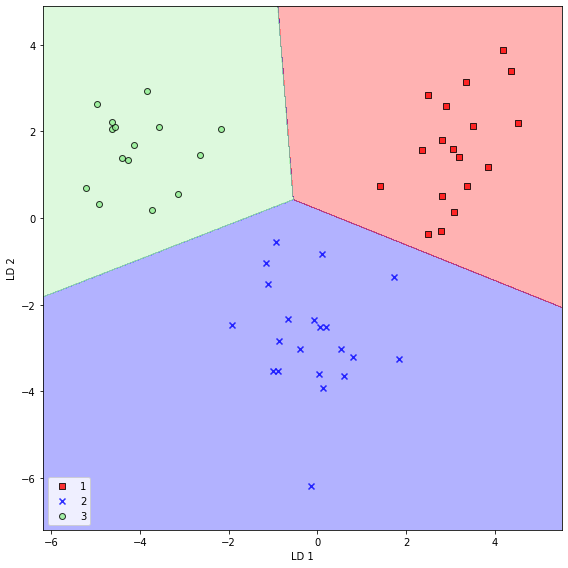

Acuracy: 1.0


In [17]:
# Test with feature extraction

# dimensionality reduction:
X_test_lda = feat_extractor.transform(X_test_std)

# predicting with the logistic regression model on the reduced dataset:
plot_decision_regions(X_test_lda, y_test, classifier=model)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()
print(f"Acuracy: {accuracy_score(y_test, model.predict(X_test_lda))}")